In [2]:
import pandas as pd
import numpy as numpy
from zipfile import ZipFile
from functools import reduce
import matplotlib.pyplot as plt
from scipy import stats
import os

In [3]:
path = r"C:\Users\ncc777\Downloads\archive (1).zip"

extracted_file = "data_files"

In [4]:
with ZipFile(path, "r") as f:
    f.extractall("data_files")

In [5]:
data_frames = {}

for file in os.listdir(extracted_file):
    if file.endswith("csv"):
        file_path = os.path.join(extracted_file,file)
        data_frames[file] = pd.read_csv(file_path)


In [6]:
for name, df in data_frames.items():
    print(f"{name}")
 

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [7]:
customers = pd.read_csv(r"data_files\olist_customers_dataset.csv")
customers.head()
print(customers.shape)
print(customers.columns)

(99441, 5)
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


In [8]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
order_data = pd.read_csv(r"data_files\olist_orders_dataset.csv")
print(order_data.shape)
print(order_data.columns)

(99441, 8)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [10]:
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
geolocation = pd.read_csv(r"data_files\olist_geolocation_dataset.csv")
print(geolocation.shape)
print(geolocation.columns)

(1000163, 5)
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


In [12]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
order_items = pd.read_csv(r"data_files\olist_order_items_dataset.csv")
print(order_items.shape)
print(order_items.columns)

(112650, 7)
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [14]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payment = pd.read_csv(r"data_files\olist_order_payments_dataset.csv")
print(order_payment.columns)
print(order_payment.shape)

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
(103886, 5)


In [16]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [17]:
order_reviews = pd.read_csv(r"data_files\olist_order_reviews_dataset.csv")
print(order_reviews.columns)
print(order_reviews.shape)

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
(99224, 7)


In [18]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
product = pd.read_csv(r"data_files\olist_products_dataset.csv")
print(product.columns)
print(product.shape)

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
(32951, 9)


In [20]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers = pd.read_csv(r"data_files\olist_sellers_dataset.csv")
print(order_reviews.columns)
print(order_reviews.shape)

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
(99224, 7)


In [22]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
product_category = pd.read_csv(r"data_files\product_category_name_translation.csv")
print(product_category.columns)
print(product_category.shape)

Index(['product_category_name', 'product_category_name_english'], dtype='object')
(71, 2)


In [24]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [25]:
# To view all the columns in each dataset at once 
for name, df in data_frames.items():
    print(f"{name}: {list(df.columns)}")

olist_customers_dataset.csv: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
olist_geolocation_dataset.csv: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
olist_orders_dataset.csv: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
olist_order_items_dataset.csv: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
olist_order_payments_dataset.csv: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
olist_products_dataset.csv: ['product_id', 'product_category_name', 'pro

In [27]:
# Get sets of columns for each file
columns_per_file = {name: set(df.columns) for name, df in data_frames.items()}
columns_per_file

{'olist_customers_dataset.csv': {'customer_city',
  'customer_id',
  'customer_state',
  'customer_unique_id',
  'customer_zip_code_prefix'},
 'olist_geolocation_dataset.csv': {'geolocation_city',
  'geolocation_lat',
  'geolocation_lng',
  'geolocation_state',
  'geolocation_zip_code_prefix'},
 'olist_orders_dataset.csv': {'customer_id',
  'order_approved_at',
  'order_delivered_carrier_date',
  'order_delivered_customer_date',
  'order_estimated_delivery_date',
  'order_id',
  'order_purchase_timestamp',
  'order_status'},
 'olist_order_items_dataset.csv': {'freight_value',
  'order_id',
  'order_item_id',
  'price',
  'product_id',
  'seller_id',
  'shipping_limit_date'},
 'olist_order_payments_dataset.csv': {'order_id',
  'payment_installments',
  'payment_sequential',
  'payment_type',
  'payment_value'},
 'olist_order_reviews_dataset.csv': {'order_id',
  'review_answer_timestamp',
  'review_comment_message',
  'review_comment_title',
  'review_creation_date',
  'review_id',
  're

In [28]:
# Intersection (columns that appear in every file)
common_cols = reduce(set.intersection, columns_per_file.values())
print("Common columns across all CSVs:", common_cols)

Common columns across all CSVs: set()


In [29]:
#1️. Customers + Orders
orders_customers = pd.merge(order_data, customers, on= "customer_id", how = "right")
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [30]:
orders_customers.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [33]:
#2. Orders + Payments
orders_payments = pd.merge(orders_customers, order_payment, on="order_id", how="left")
orders_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


In [34]:
#3️. Orders + Reviews
orders_reviews = pd.merge(orders_payments, order_reviews, on="order_id", how="left")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [35]:
#4. Orders + Order Items
orders_items = pd.merge(orders_reviews, order_items, on="order_id", how="left")
orders_items.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [36]:
#5️. Order Items + Products
orders_products = pd.merge(orders_items, product, on="product_id", how="left")
orders_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [37]:
#6️. Products + Product Category Translation
orders_products = pd.merge(
    orders_products, product_category, on="product_category_name", how="left"
)
orders_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [38]:
#7️. Order Items + Sellers
orders_sellers = pd.merge(orders_products, sellers, on="seller_id", how="left")
orders_sellers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


In [39]:
#8. Customers + Geolocation (via zip prefix)
#  Note: many geolocations per ZIP, so we take first occurrence per prefix
geo_unique = geolocation.groupby("geolocation_zip_code_prefix").first().reset_index()

final_df = pd.merge(
    orders_sellers,
    geo_unique,
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
)

print(final_df.shape)
final_df.head()

(119143, 45)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,perfumery,31570.0,belo horizonte,SP,47813.0,-12.169860,-44.988369,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,auto,14840.0,guariba,SP,75265.0,-16.746337,-48.514624,vianopolis,GO


In [43]:
# Probability

# Question: What is the probability that a randomly chosen order received a 5-star review?

# Basic Prob = favorable outcome / total outcomes

# we will be using the order_review data to answer this question

orders_reviews.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [41]:
# p(5star) = number of 5-stars review/total reviews

favourable = (order_reviews["review_score"] == 5).sum()
total_reviews = len(order_reviews)

p_5star = favourable/total_reviews

print(f"probability of 5 stars = {round(p_5star *100,2)}%")

probability of 5 stars = 57.78%


**Interpretation of result**

Approximately 58% of customers give 5 stars. This is the baseline "success" probability of excellent reviews.

In [44]:
# Complementary Probability

# 1-P(A)

# Question: What is the probability that a review is not 5 stars?
#If we know the probability of 5 stars, what’s the probability of not getting a 5-star review?
#This means any rating from 1 to 4.

p_not5 = (order_reviews["review_score"] != 5).sum() / len(order_reviews)

print(f"P(Review ≠ 5 stars) = {round(p_not5 *100, 2)}%")



P(Review ≠ 5 stars) = 42.22%


**Interpretation**

Approximately 42% of reviews are less than perfect. This highlights that not everyone is fully satisfied with product purchased

In [45]:
# Joint Probability

# Concept: P(A∩B)

# Question: What is the probability that an order was paid by credit card and received a 5-star review?

In [46]:
#This gives the likelihood of two events happening together.

# Here we will be using the orders_payments and orders_reviews. And we have merged them already
# lets merge orders_payments and order_reviews
order_reviews.head(2)

orders_payment_reviews = pd.merge(orders_reviews, orders_payments, on="order_id", how="left")
orders_payment_reviews.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,...,order_delivered_customer_date_y,order_estimated_delivery_date_y,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00


In [47]:
orders_payment_reviews.columns

Index(['order_id', 'customer_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'customer_unique_id_x',
       'customer_zip_code_prefix_x', 'customer_city_x', 'customer_state_x',
       'payment_sequential_x', 'payment_type_x', 'payment_installments_x',
       'payment_value_x', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id_y', 'order_status_y',
       'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'customer_unique_id_y',
       'customer_zip_code_prefix_y', 'customer_city_y', 'customer_state_y',
       'payment_sequential_y', 'payment_type_y', 'payment_installments_y',
       'payment_value_y'],
      dt

In [48]:
favourable_joint = ((orders_payment_reviews["payment_type_y"]=="credit_card") &
                    (orders_payment_reviews["review_score"]==5)).sum()

total_orders = len(orders_payment_reviews)

p_joint = favourable_joint / total_orders

print(f"P(Credit Card ∩ 5 stars) = {round(p_joint *100, 2)}%")

P(Credit Card ∩ 5 stars) = 37.51%


**Interpretation**

Approximately 38% of all orders are both paid by credit card and get a perfect review.

Conditional Probability

Concept:

`𝑃(𝐴∣𝐵)=𝑃(𝐴∩𝐵)/𝑃(𝐵)` 
                
`𝑃(𝐴∣𝐵)= Favourable_outcomes / Total_credit_card_outcomes`

Question: What is the probability that a review is 5 stars given that the payment was made by credit card?

In [ ]:
# If we already know the payment method was credit card, what is the probability that the review is 5 stars?
# This measures satisfaction among credit card users only.
# We are solving for independent conditional probability

# We might took few steps, and solve beyond the question for proper understanding
# That is, P(5 stars∣payment method = X)

#𝑃(5∣credit_card)
#P(5∣voucher)
#P(5∣boleto)
# Each is a separate conditional distribution. They are not mutually exclusive outcomes of the same experiment.

favourable_cond = ((orders_payment_reviews["payment_type_y"]=="credit_card") &
                   (orders_payment_reviews["review_score"]==5)).sum()

total_credit = (orders_payment_reviews["payment_type_y"]=="credit_card").sum()

p_cond = favourable_cond / total_credit

print(f"P(5 stars | Credit Card) = {round(p_cond *100, 2)}%")


favourable_cond = ((orders_payment_reviews["payment_type_y"]=="voucher") &
                   (orders_payment_reviews["review_score"]==5)).sum()

total_credit = (orders_payment_reviews["payment_type_y"]=="voucher").sum()

p_cond = favourable_cond / total_credit

print(f"P(5 stars | voucher) = {round(p_cond *100, 2)}%")


favourable_cond = ((orders_payment_reviews["payment_type_y"]=="boleto") &
                   (orders_payment_reviews["review_score"]==5)).sum()

total_credit = (orders_payment_reviews["payment_type_y"]=="boleto").sum()

p_cond = favourable_cond / total_credit
print(f"P(5 stars | boleto) = {round(p_cond *100, 2)}%")




P(5 stars | Credit Card) = 57.39%
P(5 stars | voucher) = 55.71%
P(5 stars | boleto) = 56.95%


**Interpretation**

Each one is around 55–57%, meaning in every payment method, about half of customers gave 5 stars.

_______________________________________________________________________________
_______________________________________________________________________________

In [57]:
orders_payment_reviews["payment_type_y"].value_counts()

payment_type_y
credit_card    80942
voucher        21431
boleto         19910
debit_card      1539
not_defined        3
Name: count, dtype: int64

Bayes’ Rule 

Concept:

`P(A∣B )= P(B∣A)⋅P(A) / P(B)`

A = payment

B = review =5

`P(payment | review=5) = P(review=5 | payment).p(payment) / p(review =5)`


Question: Given that an order received a 5-star review, what is the probability that it was paid with each payment method (credit_card, boleto, voucher)?


Among only the 5-star reviews, how are payment methods distributed?


In [66]:
# Among orders that got a 5-star review, what fraction used each payment method (credit_card, boleto, voucher, etc.)?
# That is, if we look at only 5-star reviews,  how are they split across payment types?

# Total number of 5-star reviews (denominator for all)
total_5star = (orders_payment_reviews["review_score"] == 5).sum()

# ---- P(payment = credit_card | review = 5) ----
favourable_cond = ((orders_payment_reviews["payment_type_y"]=="credit_card") & 
                   (orders_payment_reviews["review_score"]==5)).sum()

p_cond = favourable_cond / total_5star 

print(f"P(Credit Card | 5 stars) = {round(p_cond * 100, 2)}%")

# ---- P(payment = voucher | review = 5) ----
favourable_cond = ((orders_payment_reviews["payment_type_y"]=="voucher") & 
                   (orders_payment_reviews["review_score"]==5)).sum()

p_cond = favourable_cond / total_5star
print(f"P(Voucher | 5 stars) = {round(p_cond * 100, 2)}%")

# ---- P(payment = boleto | review = 5) ----
favourable_cond = ((orders_payment_reviews["payment_type_y"]=="boleto") & 
                   (orders_payment_reviews["review_score"]==5)).sum()

p_cond = favourable_cond / total_5star
print(f"P(Boleto | 5 stars) = {round(p_cond * 100, 2)}%")

# ---- P(payment = debit card | review = 5) ----
favourable_cond = ((orders_payment_reviews["payment_type_y"]=="debit_card") & 
                   (orders_payment_reviews["review_score"]==5)).sum()

p_cond = favourable_cond / total_5star
print(f"P(debit_card  | 5 stars) = {round(p_cond * 100, 2)}%")

# ---- P(payment = not_defined | review = 5) ----
favourable_cond = ((orders_payment_reviews["payment_type_y"]=="not_defined") & 
                   (orders_payment_reviews["review_score"]==5)).sum()

p_cond = favourable_cond / total_5star
print(f"P(not_defined  | 5 stars) = {round(p_cond * 100, 2)}%")


P(Credit Card | 5 stars) = 65.74%
P(Voucher | 5 stars) = 16.9%
P(Boleto | 5 stars) = 16.05%
P(debit_card  | 5 stars) = 1.31%
P(not_defined  | 5 stars) = 0.0%


**Question1**

What is the average delivery time (expectation) and variance (spread/consistency) of deliveries?

In [51]:
orders_payment_reviews.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,...,order_delivered_customer_date_y,order_estimated_delivery_date_y,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00


In [52]:
# First convert the datetime columns to pandas datetime

# Convert to datetime
orders_payment_reviews["order_purchase_timestamp_x"] = pd.to_datetime(orders_payment_reviews["order_purchase_timestamp_x"])
orders_payment_reviews["order_delivered_customer_date_x"] = pd.to_datetime(orders_payment_reviews["order_delivered_customer_date_x"])

# Calculate delivery time in days
orders_payment_reviews["delivery_time_days"] = (orders_payment_reviews["order_delivered_customer_date_x"] - orders_payment_reviews["order_purchase_timestamp_x"]).dt.days

# Drop missing values
delivery_times = orders_payment_reviews["delivery_time_days"].dropna()

# Lets get the exepctation(mean)
mean_delivery = delivery_times.mean()

# Variance & Standard Deviation
variance_delivery = delivery_times.var()
std_delivery = delivery_times.std()

print("Expected delivery time (Mean):", round(mean_delivery, 2), "days")
print("Variance of delivery time:", round(variance_delivery, 2))
print("Standard Deviation of delivery time:", round(std_delivery, 2), "days")

Expected delivery time (Mean): 12.13 days
Variance of delivery time: 89.28
Standard Deviation of delivery time: 9.45 days


**Question2**

What is the expected customer review score and how much do reviews vary?

In [53]:
# Expectation (Mean review score)
mean_review = orders_payment_reviews["review_score"].mean()

# Variance & Standard Deviation
variance_review = orders_payment_reviews["review_score"].var()
std_review = orders_payment_reviews["review_score"].std()

print("Expected review score (Mean):", round(mean_review, 2))
print("Variance of review score:", round(variance_review, 2))
print("Standard Deviation of review score:", round(std_review, 2))

Expected review score (Mean): 4.06
Variance of review score: 1.88
Standard Deviation of review score: 1.37


**Interpretation**

The mean review score shows the overall satisfaction (e.g., ~4 stars = mostly happy customers). The std tells us that most customers give between 3 and 5 stars. If Std was very high (e.g., 2), it would mean customers are divided (some give 1, others give 5). But here, the service reputation is fairly consistent.

### **Sampling & Estimation**

In [54]:
# Population mean (true mean from entire dataset)
pop_mean_payment = orders_payment_reviews["payment_value_y"].mean()

# lets take a random sample of 50 orders
sample_50 = orders_payment_reviews["payment_value_y"].sample(50, random_state=42)
sample_mean_50 = sample_50.mean()

# Take a random sample of 200 orders
sample_200 = orders_payment_reviews["payment_value_y"].sample(200, random_state=42)
sample_mean_200 = sample_200.mean()

print("Population mean payment value:", round(pop_mean_payment, 2))
print("Sample mean (n=50):", round(sample_mean_50, 2))
print("Sample mean (n=200):", round(sample_mean_200, 2))


Population mean payment value: 135.83
Sample mean (n=50): 111.91
Sample mean (n=200): 135.99


### **Law of Large Numbers (LLN)**

The Law of Large Numbers says,

"As the sample size increases, the sample mean → converges to the true population mean"

In [55]:
import numpy as np

# Draw increasing sample sizes and track their means
sample_sizes = [10, 50, 100, 500, 1000, 5000]
sample_means = []

for n in sample_sizes:
    sample = orders_payment_reviews["payment_value_y"].sample(n, random_state=234)
    sample_means.append(sample.mean())

# Show results
for n, mean in zip(sample_sizes, sample_means):
    print(f"Sample size={n}, Sample mean={round(mean,2)}")
    
print("Population mean (true):", round(pop_mean_payment, 2))

Sample size=10, Sample mean=101.01
Sample size=50, Sample mean=89.77
Sample size=100, Sample mean=105.9
Sample size=500, Sample mean=138.0
Sample size=1000, Sample mean=137.0
Sample size=5000, Sample mean=134.04
Population mean (true): 135.83


**Interpretation**

The result above should expplain the reliability of big data, right?

With 10 samples, the mean may jump around (unreliable).Ad with 1000+ samples the  mean is almost the same as population mean.

### **Central Limit Theorem (CLT)**

In [59]:
orders_payment_reviews.head(2)

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,...,order_estimated_delivery_date_y,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,8.0


In [60]:
orders_payment_reviews.columns

Index(['order_id', 'customer_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'customer_unique_id_x',
       'customer_zip_code_prefix_x', 'customer_city_x', 'customer_state_x',
       'payment_sequential_x', 'payment_type_x', 'payment_installments_x',
       'payment_value_x', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id_y', 'order_status_y',
       'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'customer_unique_id_y',
       'customer_zip_code_prefix_y', 'customer_city_y', 'customer_state_y',
       'payment_sequential_y', 'payment_type_y', 'payment_installments_y',
       'payment_value_y', 'delivery

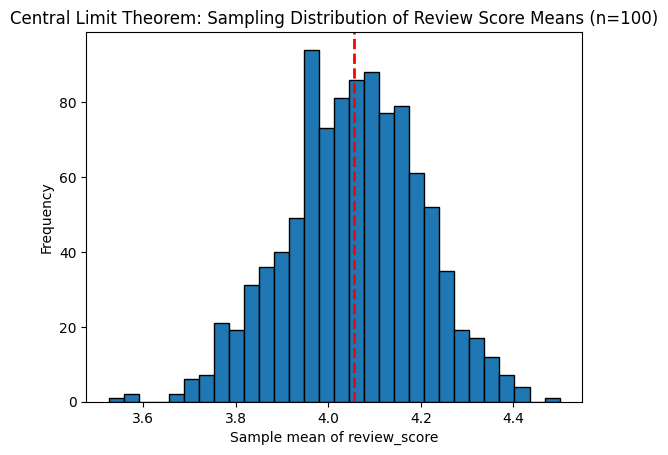

In [61]:
# lets collect 100 samples of review_scores, take the mean. Repeat the same process a thousand times.
# Then take all the 1000 means use it to plot a histogram and lets see what the shape or distribution would look like.

# Collect many sample means
sample_means = []
for i in range(1000):   # repeat 1000 times
    sample = orders_payment_reviews["review_score"].sample(100, replace=True)
    sample_means.append(sample.mean())

# Plot the sampling distribution of the mean
plt.hist(sample_means, bins=30, edgecolor="black")
plt.axvline(np.mean(sample_means), color="red", linestyle="dashed", linewidth=2)
plt.title("Central Limit Theorem: Sampling Distribution of Review Score Means (n=100)")
plt.xlabel("Sample mean of review_score")
plt.ylabel("Frequency")
plt.show()


### **1. Correlation**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set seed for reproducibility
np.random.seed(234)

In [14]:
students = 40
study_hours = np.random.randint(1, 10, students)  # 1 to 9 hours study
job_hours = np.random.randint(0, 15, students)     # 0 to 14 hours job
sleep_hours = np.random.randint(4, 9, students)    # 4 to 8 hours sleep
extracurricular = np.random.randint(0, 6, students) # 0 to 5 hrs activities

# Exam score: positively influenced by study & sleep, negatively by job & extra activities
exam_score = (40 
              + 5*study_hours        # strong positive
              + 2*sleep_hours        # mild positive
              - 3*job_hours          # strong negative
              - 1*extracurricular    # mild negative
              + np.random.randint(-5,5,students))  # noise
data = pd.DataFrame({
    'Study Hours': study_hours,
    'Job Hours': job_hours,
    'Sleep Hours': sleep_hours,
    'Extracurricular Hours': extracurricular,
    'Exam Score': exam_score
})
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,4,1,8,0,74
1,9,6,4,5,74
2,4,0,4,0,68
3,4,1,5,3,61
4,2,2,6,1,59


In [15]:
# lets compute the correlation coefficients for each data feature
# 

corr_coefficients = data.corr()
corr_coefficients

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
Study Hours,1.000000,0.136908,-0.194350,0.037503,0.610973
Job Hours,0.136908,1.000000,0.129423,0.058219,-0.665569
Sleep Hours,-0.194350,0.129423,1.000000,-0.080912,-0.097107
Extracurricular Hours,0.037503,0.058219,-0.080912,1.000000,-0.134016
Exam Score,0.610973,-0.665569,-0.097107,-0.134016,1.000000


In [16]:
data.columns

Index(['Study Hours', 'Job Hours', 'Sleep Hours', 'Extracurricular Hours',
       'Exam Score'],
      dtype='object')

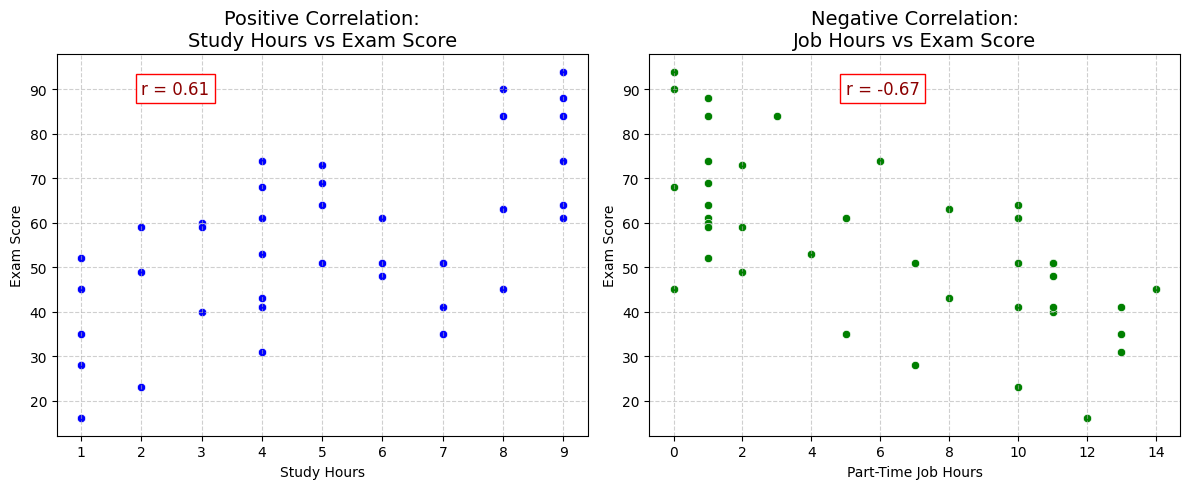

In [19]:
# Plot: Positive and Negative examples
plt.figure(figsize=(12,5))

# Positive correlation: Study vs Score
plt.subplot(1,2,1)
sns.scatterplot(x='Study Hours', y='Exam Score', data=data, color='blue')
plt.title("Positive Correlation:\nStudy Hours vs Exam Score", fontsize=14)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(data['Exam Score'])-5, f"r = {corr_coefficients.loc['Study Hours','Exam Score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

# Negative correlation: Job vs Score
plt.subplot(1,2,2)
sns.scatterplot(x='Job Hours', y='Exam Score', data=data, color='green')
plt.title("Negative Correlation:\nJob Hours vs Exam Score", fontsize=14)
plt.xlabel("Part-Time Job Hours")
plt.ylabel("Exam Score")
plt.text(5, max(data['Exam Score'])-5, f"r = {corr_coefficients.loc['Job Hours','Exam Score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


### **Regression**